## Procuring and Reading Geospatial Data

In [ ]:
!pip install cdsapi

In [ ]:
!echo -e "url: https://cds.climate.copernicus.eu/api/v2\nkey: {your_uid}:{your_api-key}" >> /root/.cdsapirc
!ls /root -a
!cat /root/.cdsapirc

#### Importing libraries

In [ ]:
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

#### Downloading data

In [ ]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': [
            '2m_temperature', 'total_precipitation', 'volumetric_soil_water_layer_1',
        ],
        'year': '2019',
        'month': '12',
        'day': [
            '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
    },
    'download.nc')

In [ ]:
data = xr.open_dataset("download.nc")

#### Displaying data

1. Viewing content of entire data
2. Viewing content of each DataArray separately i.e temperature, precipitation and volumetric soil water

In [ ]:
print(data)
print('*'*100)
print(data.t2m)
print('*'*100)
print(data.tp)
print('*'*100)
print(data.swvl1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 15)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-17T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-10 12:03:13 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
****************************************************************************************************
<xarray.DataArray 't2m' (time: 15, latitude: 1801, longitude: 3600)>
[97254000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
 

## Exploring and Visualising Geospatial Data

#### Spatial Resolution  
From the above output we can see that latitude and longitude are increasing by 0.1 everytime.  
<center> OR </center>  

Range of latitude/Total Values of latitude = 180/1801 = 0.1 (approx)  
Range of longitude/Total Values of longitude = 360/3600 = 0.1  

In [ ]:
temp_data = xr.DataArray.to_dataframe(data.t2m)
ppt_data = xr.DataArray.to_dataframe(data.tp)
water_data = xr.DataArray.to_dataframe(data.swvl1)

### Exploring temperature of air at 2m above the surface

1. Converting temperature in Kelvin to degree Celsius

In [ ]:
temp = data.t2m -273.15
temp.attrs = data.t2m.attrs
temp.attrs['units'] = 'deg C'

In [ ]:
def get_stats(attribute):
    print('Mean:', np.mean(attribute).item(0))
    print('Median:', np.median(attribute).item(0))
    print('Variance:', np.var(attribute).item(0))
    print('Std deviation:', np.std(attribute).item(0))
    print('Mean without NaN:', np.nanmean(attribute).item(0))
    print('Median without NaN:', np.nanmedian(attribute).item(0))
    print('Variance without NaN:', np.nanvar(attribute).item(0))
    print('Std deviation without NaN:', np.nanstd(attribute).item(0))
    print('Maximum:', np.nanmax(attribute).item(0))
    print('Minimum:', np.nanmin(attribute).item(0))

2. Printing out the basic statistics (with and without `NaN` values)

In [ ]:
get_stats(temp)

Mean: -5.146045207977295
Median: nan
Variance: 465.1917724609375
Std deviation: 21.56830406188965
Mean without NaN: -5.146045207977295
Median without NaN: -9.5078125
Variance without NaN: 486.3752746582031
Std deviation without NaN: 22.053916931152344
Maximum: 44.6236572265625
Minimum: -51.86480712890625


3. Visualizing the temperature on 17th and 31st December 2019  
Reference link: https://xarray.pydata.org/en/stable/plotting.html#controlling-the-figure-size 

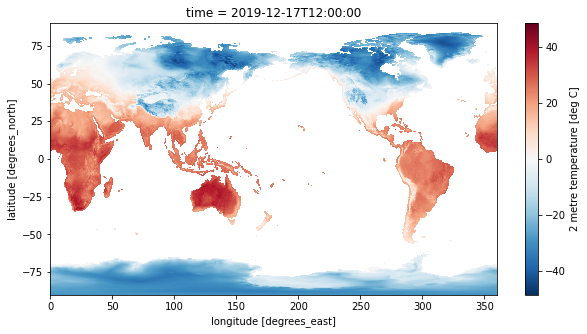

In [ ]:
temp[0].plot(aspect=2, size=5)

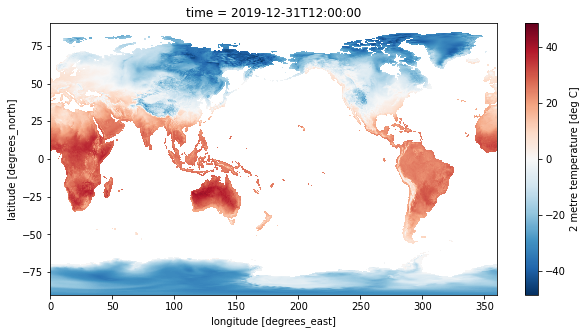

In [ ]:
temp[-1].plot(aspect=2, size=5)

Observation from 17th December to 31st December:  
- The Southern Hemisphere starts heating up, especially Australia and southern Africa.
- North India witnesses a decrease in the temperature

4. Visualizing the temperature histograms on 17th and 31st December 2019  
Reference link: https://xarray.pydata.org/en/stable/generated/xarray.plot.hist.html

(array([ 17191., 244284., 439074., 294681., 341272., 159606., 136567.,
        233197., 274514.,  72477.]),
 array([-48.428314 , -39.362373 , -30.296436 , -21.230495 , -12.1645565,
         -3.0986176,   5.967322 ,  15.033261 ,  24.099201 ,  33.16514  ,
         42.23108  ], dtype=float32),
 <a list of 10 Patch objects>)

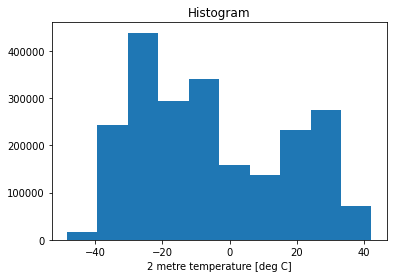

In [ ]:
xr.plot.hist(temp[0])

(array([ 24585., 210553., 428507., 318491., 332000., 218006., 146590.,
        189397., 280740.,  63994.]),
 array([-48.6904  , -39.59192 , -30.493439, -21.394958, -12.296478,
         -3.197998,   5.900482,  14.998962,  24.097443,  33.195923,
         42.294403], dtype=float32),
 <a list of 10 Patch objects>)

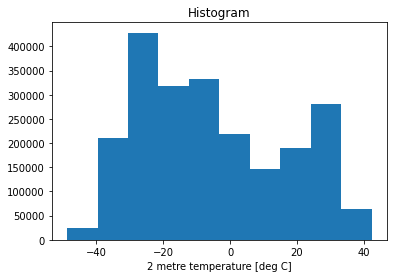

In [ ]:
xr.plot.hist(temp[-1])

As seen from the above histograms, the temperature data appears to be somewhat left skewed. Reference: https://www.mathsisfun.com/data/skewness.html    
Observation from 17th December to 31st December:  
- Temperature data collected from most of the points appear to below 0 deg Celsius
- Left skewness is due to decrease in temperature during the observed time interval

### Exploring total precipitation 

In [ ]:
ppt = data.tp

1. Printing out the basic statistics (with and without NaN values)

In [ ]:
get_stats(ppt)

Mean: 0.000678194803185761
Median: nan
Variance: 6.188233328430215e-06
Std deviation: 0.00248761591501534
Mean without NaN: 0.000678194803185761
Median without NaN: 1.6279518604278564e-05
Variance without NaN: 6.522968760691583e-06
Std deviation without NaN: 0.0025540103670209646
Maximum: 0.17785921692848206
Minimum: 0.0


2. Visualizing the total precipitation plots on 17th and 31st December 2019

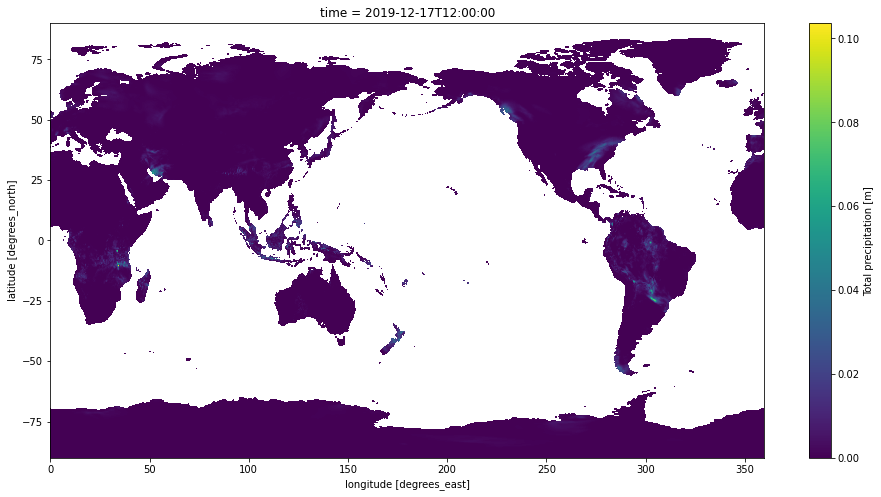

In [ ]:
ppt[0].plot(aspect=2, size=8)

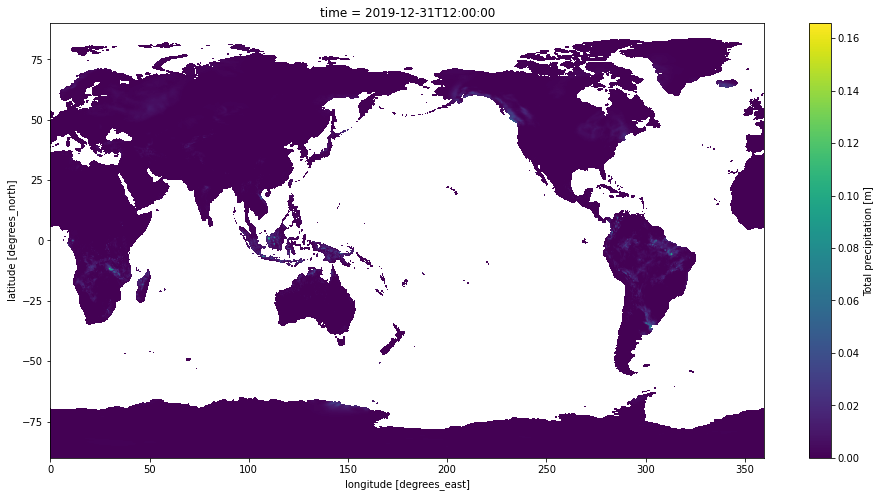

In [ ]:
ppt[-1].plot(aspect=2, size=8)

Observation from 17th December to 31st December:  
- Total precipitation over South India, west USA and some parts of Africa has reduced
- Precipitation elsewhere remains constant

3. Visualizing the total precipiation histograms on 17th and 31st December 2019

(array([2.137816e+06, 4.184200e+04, 1.619100e+04, 8.373000e+03,
        4.110000e+03, 2.096000e+03, 1.029000e+03, 5.160000e+02,
        2.860000e+02, 1.940000e+02, 1.110000e+02, 9.200000e+01,
        6.500000e+01, 6.100000e+01, 4.100000e+01, 2.300000e+01,
        9.000000e+00, 2.000000e+00, 4.000000e+00, 2.000000e+00]),
 array([0.        , 0.00518436, 0.01036872, 0.01555308, 0.02073744,
        0.0259218 , 0.03110616, 0.03629052, 0.04147488, 0.04665924,
        0.0518436 , 0.05702796, 0.06221232, 0.06739668, 0.07258104,
        0.0777654 , 0.08294976, 0.08813412, 0.09331848, 0.09850284,
        0.1036872 ], dtype=float32),
 <a list of 20 Patch objects>)

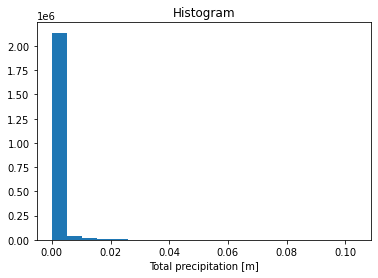

In [ ]:
xr.plot.hist(ppt[0], bins=20)

(array([2.164992e+06, 3.413700e+04, 9.096000e+03, 2.760000e+03,
        8.400000e+02, 4.310000e+02, 2.150000e+02, 1.050000e+02,
        8.600000e+01, 6.200000e+01, 5.400000e+01, 2.800000e+01,
        1.900000e+01, 1.000000e+01, 1.000000e+01, 1.000000e+01,
        3.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00]),
 array([0.        , 0.00828895, 0.0165779 , 0.02486685, 0.03315581,
        0.04144476, 0.04973371, 0.05802266, 0.06631161, 0.07460056,
        0.08288951, 0.09117846, 0.09946741, 0.10775637, 0.11604532,
        0.12433427, 0.13262323, 0.14091218, 0.14920112, 0.15749007,
        0.16577902], dtype=float32),
 <a list of 20 Patch objects>)

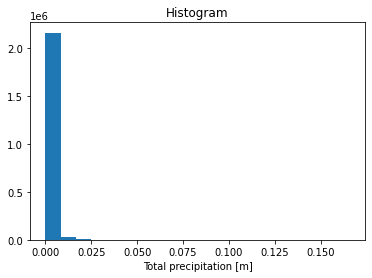

In [ ]:
xr.plot.hist(ppt[-1], bins=20)

The histogram plot for total precipitation is left skewed as seen above.

### Exploring Volumetric soil water layer 1

In [ ]:
water = data.swvl1

1. Printing out the basic statistics (with and without NaN values)

In [ ]:
get_stats(water.values)

Mean: nan
Median: nan
Variance: nan
Std deviation: nan
Mean without NaN: 0.26440200209617615
Median without NaN: 0.27127522230148315
Variance without NaN: 0.016962166875600815
Std deviation without NaN: 0.13023889064788818
Maximum: 0.7660064697265625
Minimum: 0.0


2. Visualizing the volumetric soil water layer 1 plots on 17th and 31st December 2019

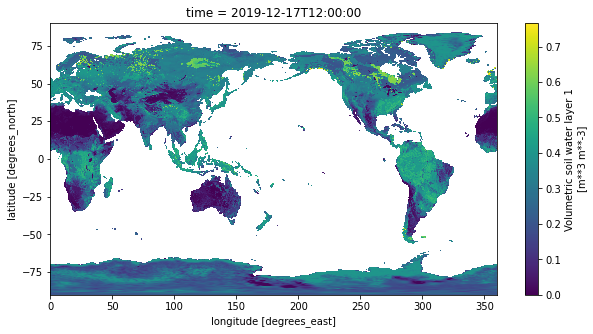

In [ ]:
water[0].plot(aspect=2, size=5)

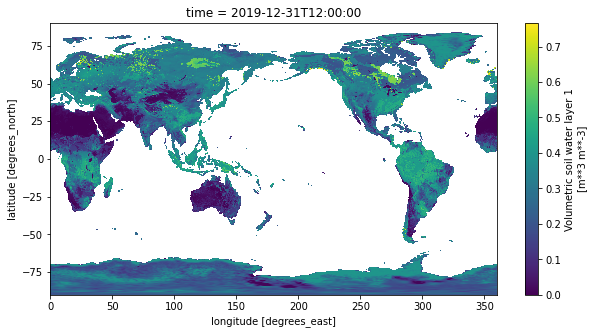

In [ ]:
water[-1].plot(aspect=2, size=5)

Observations:  
- Purple colored areas indicate the semi-arid and desert regions.
- In south India, there has been a drop in water content from 1st Dec to 31st December. (This was observed initially when considering all 31 days of December)

3. Visualizing the volumetric soil water layer 1 histograms on 17th and 31st December 2019

(array([245217., 132631., 480666., 417535., 536103., 289011.,  69816.,
         22750.,  18355.,    779.]),
 array([0.        , 0.07660065, 0.1532013 , 0.22980194, 0.3064026 ,
        0.38300323, 0.45960388, 0.5362045 , 0.6128052 , 0.6894058 ,
        0.76600647], dtype=float32),
 <a list of 10 Patch objects>)

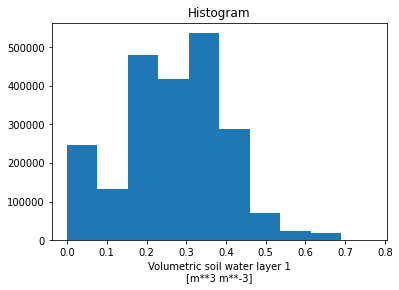

In [ ]:
xr.plot.hist(water[0])

(array([247360., 130962., 484533., 419522., 546758., 276688.,  65507.,
         25529.,  15007.,    997.]),
 array([0.        , 0.07660065, 0.1532013 , 0.22980194, 0.3064026 ,
        0.38300323, 0.45960388, 0.5362045 , 0.6128052 , 0.6894058 ,
        0.76600647], dtype=float32),
 <a list of 10 Patch objects>)

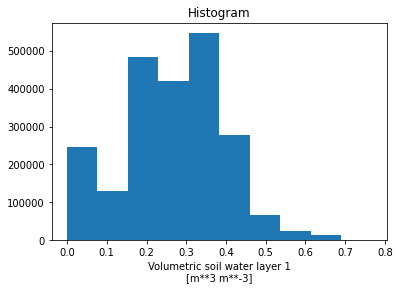

In [ ]:
xr.plot.hist(water[-1])

As seen from the above histograms, the volumetric soil water layer 1 appears to be a normal distribution. There is not much difference between the 2 histograms which may indicate that the soil water layer 1 content has been constant during the 15 day interval.



#### Checking for NaN values

From the figure below, it is quite evident that the NaN values mostly comprise of the ocean. Here, the NaN values have been filled with 0.16 as most of the previous plot did not contain this value. 

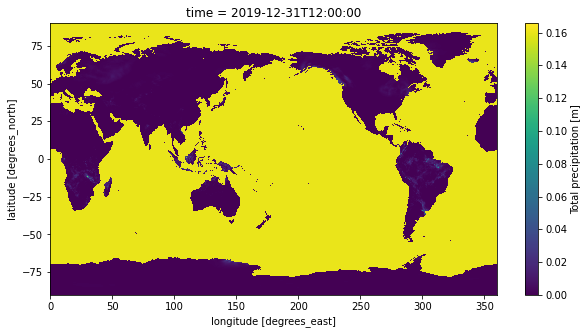

In [ ]:
ppt[-1].fillna(0.16).plot(aspect=2, size=5)

## Preprocessing Geospatial Data

In [ ]:
regrid_lat = np.around(np.flip(np.arange(-90, 90.1, 0.05, dtype=np.float32)),
                       decimals=2) # new coordinates
regrid_lon = np.around(np.arange(0, 360, 0.05, dtype=np.float32),
                       decimals=2) # new coordinates

In [ ]:
print(regrid_lat.size)
print(regrid_lon.size)

3602
7200


### Interpolating temperature data

In [ ]:
temp_intr = xr.DataArray(coords=[temp.time, regrid_lat, regrid_lon],
                         dims=["time", "latitude", "longitude"], 
                         attrs=temp.attrs)

In [ ]:
for i in range(15):
    temp_intr.data[i] = temp[i].interp(latitude = regrid_lat, longitude = regrid_lon,
                                    method = "linear") # specify calculation
    time.sleep(5)
temp_intr

<xarray.DataArray (time: 15, latitude: 3602, longitude: 7200)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-28.4012146 , -28.4012146 , -28.4012146 , ..., -28.4012146 ,
         -28.4012146 ,          nan],
        [-28.71627045, -28.71627045, -28.71627045, ..., -28.71627045,
         -28.71627045,          nan],
        [-29.03137207, -29.03137207, -29.03137207, ..., -29.03137207,
         -29.03137207,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-26.72564697, -26.72564697, -26.72564697, ..., -26.72564697,
         -26.72564697,          nan],
        [-26.98771286, -26.98771095, -26.98771286, ..., -26.98771095,
         -26.98771286,          nan],
        [-27.24981689, -27.24981689, -27.24981689, ..., -27.24981689,
         -27.24981689,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-27.14822388, -27.14822388, -27.14822388, ..., -27.14527893,
         -27.14527893,          nan],
        [-27.26600647, -27.26600647, -27.26600647, ..., -27.26453209,
         -27.264534  ,          nan],
        [-27.38380432, -27.38380432, -27.38380432, ..., -27.38380432,
         -27.38380432,          nan]],

       ...,

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-26.56369019, -26.56369019, -26.56369019, ..., -26.56369019,
         -26.56369019,          nan],
        [-26.76097107, -26.76097298, -26.76097107, ..., -26.76097107,
         -26.76097107,          nan],
        [-26.95828247, -26.95828247, -26.95828247, ..., -26.95828247,
         -26.95828247,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-24.86605835, -24.86605835, -24.86605835, ..., -24.87194824,
         -24.8704834 ,          nan],
        [-25.17743683, -25.17743683, -25.17743683, ..., -25.18038177,
         -25.17964935,          nan],
        [-25.48886108, -25.48886108, -25.48886108, ..., -25.48886108,
         -25.48886108,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [-28.83702087, -28.83702087, -28.83702087, ..., -28.83776093,
         -28.83702087,          nan],
        [-29.02031708, -29.02031708, -29.02031708, ..., -29.02068901,
         -29.02031708,          nan],
        [-29.2036438 , -29.2036438 , -29.2036438 , ..., 

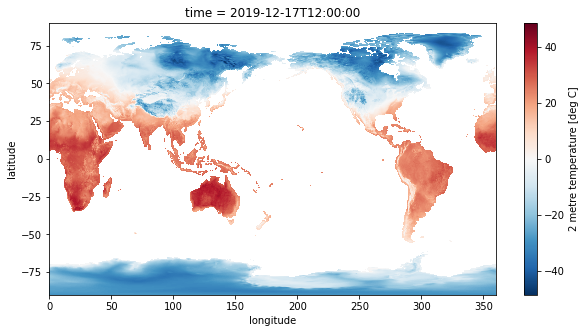

In [ ]:
temp_intr[0].plot(aspect=2, size=5)